# Лабораторная работа №1 (Проведение исследований с алгоритмом KNN)

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import  KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [121]:
df = pd.read_csv('../data_sets/smart_watch_prices.csv')
df.head()

,Brand,Model,Operating System,Connectivity,Display Type,Display Size (inches),Resolution,Water Resistance (meters),Battery Life (days),Heart Rate Monitor,GPS,NFC,Price (USD)
0,Apple,Watch Series 7,watchOS,"Bluetooth, Wi-Fi, Cellular",Retina,1.90,396 x 484,50,18,Yes,Yes,Yes,$399
1,Samsung,Galaxy Watch 4,Wear OS,"Bluetooth, Wi-Fi, Cellular",AMOLED,1.40,450 x 450,50,40,Yes,Yes,Yes,$249
2,Garmin,Venu 2,Garmin OS,"Bluetooth, Wi-Fi",AMOLED,1.30,416 x 416,50,11,Yes,Yes,No,$399
3,Fitbit,Versa 3,Fitbit OS,"Bluetooth, Wi-Fi",AMOLED,1.58,336 x 336,50,6,Yes,Yes,Yes,$229
4,Fossil,Gen 6,Wear OS,"Bluetooth, Wi-Fi",AMOLED,1.28,416 x 416,30,24,Yes,Yes,Yes,$299


Проверим датасет на отсутствие информации - выведем все строки, в которых есть значение NaN.

In [122]:
nan_rows = df[df.isnull().any(axis=1)]
nan_rows.head()

,Brand,Model,Operating System,Connectivity,Display Type,Display Size (inches),Resolution,Water Resistance (meters),Battery Life (days),Heart Rate Monitor,GPS,NFC,Price (USD)
9,Skagen,Jorn Hybrid HR,NaN,Bluetooth,NaN,NaN,NaN,30,14,Yes,No,No,$195
11,Timex,Metropolitan R,NaN,Bluetooth,AMOLED,1.2,390 x 390,30,3,Yes,No,No,$179
21,Fossil,Collider,Hybrid OS,"Bluetooth, Wi-Fi",Analog,NaN,NaN,30,14,Yes,No,Yes,$195
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285,Timex,Metropolitan+,Timex OS,Bluetooth,E-Ink,1.5,NaN,50,1,Yes,No,No,$79


В пяти строках присутсвуют объекты NaN. Из них: одна строка полностью пустая, можно удалять её не задумываясь; одна строка имеет целых четыре значения NaN; еще одна строка с двумя значениями NaN; две строки с одним значением NaN. Четыре строки - малая величина, поэтому решено удалить эти строки.

In [123]:
df = df.dropna()

Посмотрим какие типы данных хранятся в каждом из столбцов, чтобы понимать разделение на категориальные и количественные данные.

In [124]:
print(df.dtypes)

Brand                         object
Model                         object
Operating System              object
Connectivity                  object
Display Type                  object
Display Size (inches)        float64
Resolution                    object
Water Resistance (meters)     object
Battery Life (days)           object
Heart Rate Monitor            object
GPS                           object
NFC                           object
Price (USD)                   object
dtype: object


Логично, что цена часов должна быть количественной переменной, но сейчас это не так. Посмотрев на данный столбец в датасете, видим, что в датасете к цене приписывается знак валюты, а также тысячи разделяются знаком запятой. Удалим лишние знаки в значениях для столбца цены и приведем полученные значения к числовому типу.

In [125]:
df['Price (USD)'] = df['Price (USD)'].str.replace(',', '').str.replace('$', '')
df['Price (USD)'] = pd.to_numeric(df['Price (USD)'])
df.head()

,Brand,Model,Operating System,Connectivity,Display Type,Display Size (inches),Resolution,Water Resistance (meters),Battery Life (days),Heart Rate Monitor,GPS,NFC,Price (USD)
0,Apple,Watch Series 7,watchOS,"Bluetooth, Wi-Fi, Cellular",Retina,1.90,396 x 484,50,18,Yes,Yes,Yes,399
1,Samsung,Galaxy Watch 4,Wear OS,"Bluetooth, Wi-Fi, Cellular",AMOLED,1.40,450 x 450,50,40,Yes,Yes,Yes,249
2,Garmin,Venu 2,Garmin OS,"Bluetooth, Wi-Fi",AMOLED,1.30,416 x 416,50,11,Yes,Yes,No,399
3,Fitbit,Versa 3,Fitbit OS,"Bluetooth, Wi-Fi",AMOLED,1.58,336 x 336,50,6,Yes,Yes,Yes,229
4,Fossil,Gen 6,Wear OS,"Bluetooth, Wi-Fi",AMOLED,1.28,416 x 416,30,24,Yes,Yes,Yes,299


Для применения алгоритмов машинного обучения необходима кодировка категориальных переменных в числовой формат. Используем LabelEncoder — один из способов преобразования категориальных данных в числовые метки, что облегчает работу с такими данными.


In [126]:
label_encoders = {}

categorical_columns = ['Brand', 'Model', 'Operating System', 'Connectivity', 'Display Type', 'Resolution', 'Water Resistance (meters)', 'Battery Life (days)', 'Heart Rate Monitor', 'GPS', 'NFC']

for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

df.head()

,Brand,Model,Operating System,Connectivity,Display Type,Display Size (inches),Resolution,Water Resistance (meters),Battery Life (days),Heart Rate Monitor,GPS,NFC,Price (USD)
0,1,125,33,2,16,1.90,27,5,8,0,1,1,399
1,30,35,30,2,0,1.40,31,5,16,0,1,1,249
2,8,103,9,1,0,1.30,30,5,3,0,1,0,399
3,6,107,7,1,0,1.58,19,5,22,0,1,1,229
4,7,42,30,1,0,1.28,30,4,11,0,1,1,299


Проверим, что теперь во всех столбцах хранятся числовые значения.

In [127]:
print(df.dtypes)

Brand                          int64
Model                          int64
Operating System               int64
Connectivity                   int64
Display Type                   int64
Display Size (inches)        float64
Resolution                     int64
Water Resistance (meters)      int64
Battery Life (days)            int64
Heart Rate Monitor             int64
GPS                            int64
NFC                            int64
Price (USD)                    int64
dtype: object


Создадим  набор обучающий и тестовых выборок. Целевой переменной для задачи регрессии будет цена часов. Для тестовой выборки будет отведено 20% данных, для обучающей выборки - 80%.

In [128]:
X_r = df.drop(['Price (USD)'], axis=1)
y_r = df['Price (USD)']
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_r, y_r, test_size=0.2, random_state=13)

In [129]:
model_r = KNeighborsRegressor(n_neighbors=3)

Запускаем обучение модели для задачи регрессии.

In [130]:
model_r.fit(X_train_r, y_train_r)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


Выполним оценку производительности модели машинного обучения. Для этого посмотрим на значения средней квадратической ошибки (MSE) и средней абсолютной ошибки (MAE) для предсказаний значений на тестовой и обучающей выборках.


In [131]:
def print_r(mse_1, mse_2, mae_1, mae_2):
  print(f'Mean Squared Error for test data: {mse_1:.5f}')
  print(f'Mean Absolute Error for test data: {mae_1:.5f}\n')

  print(f'Mean Squared Error for train data: {mse_2:.5f}')
  print(f'Mean Absolute Error for train data: {mae_2:.5f}')

y_pred_test_r = model_r.predict(X_test_r)
y_pred_train_r = model_r.predict(X_train_r)

mse_test = mean_squared_error(y_test_r, y_pred_test_r)
mae_test = mean_absolute_error(y_test_r, y_pred_test_r)

mse_train = mean_squared_error(y_train_r, y_pred_train_r)
mae_train = mean_absolute_error(y_train_r, y_pred_train_r)

print_r(mse_test, mse_train, mae_test, mae_train)

Mean Squared Error for test data: 10865.11259
Mean Absolute Error for test data: 52.93778

Mean Squared Error for train data: 13036.23003
Mean Absolute Error for train data: 45.01784


Попробуем **улучшить бейзлайн**. Сначала повторим изначальные действия: загрузка датасета, удаление строк с объектами NaN и конвертация цены в числовое значение.

In [132]:
df_2 = pd.read_csv('../data_sets/smart_watch_prices.csv')
df_2 = df_2.dropna()

df_2['Price (USD)'] = df_2['Price (USD)'].str.replace(',', '').str.replace('$', '')
df_2['Price (USD)'] = pd.to_numeric(df_2['Price (USD)'])

Рассмотрим подробнее значения, представленные в таблице. Начнем с анализа столбца операционных систем, выведем все его уникальные значения.

In [133]:
df_2['Operating System'].unique()

array(['watchOS', 'Wear OS', 'Garmin OS', 'Fitbit OS', 'HarmonyOS',
       'ColorOS', 'Amazfit OS', 'Withings OS', 'Polar OS', 'Tizen OS',
       'Lite OS', 'Tizen', 'Suunto OS', 'Proprietary OS', 'Proprietary',
       'LiteOS', 'Android Wear', 'MIUI for Watch', 'Custom OS',
       'Fossil OS', 'MIUI', 'RTOS', 'MyKronoz OS', 'Nubia OS',
       'Mi Wear OS', 'Zepp OS', 'Realme OS', 'Matrix OS', 'Android OS',
       'Casio OS', 'Skagen OS', 'Timex OS', 'MIUI For Watch', 'Android'],
      dtype=object)

Можно заметить, что логически Wear OS и Android Wear обозначают одно и тоже, значит требуется объединить их одним именем.

In [134]:
def segment_os(os):
    if 'Wear OS' in os or 'Android Wear' in os:
        return 'Wear OS'
    else:
      return os

df_2['Operating System'] = df_2['Operating System'].apply(segment_os)

Выведем график, отражающий сколько для каждого вида операционных систем существует объектов в датасете.

<Axes: xlabel='Operating System'>

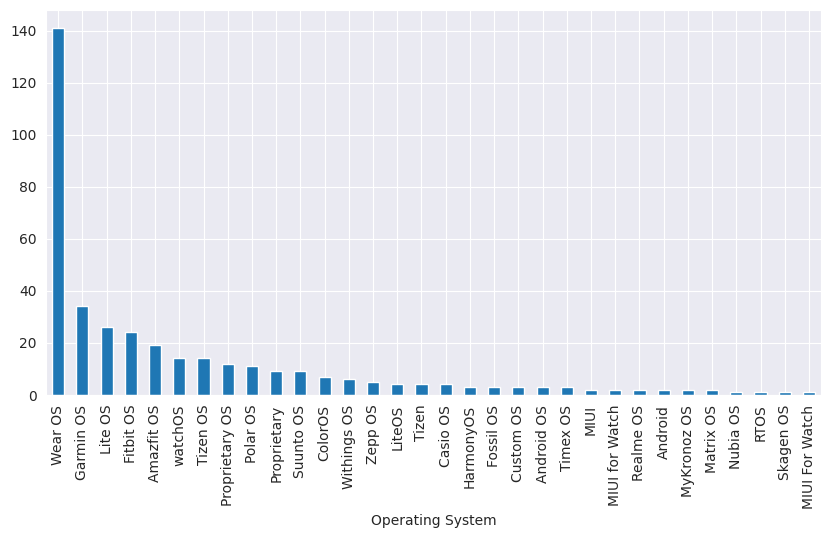

In [135]:
plt.figure(figsize=(10,5))
df_2['Operating System'].value_counts().plot(kind='bar')

Посмотрим какие значения принимают объекты по типу дисплея.


In [136]:
df_2['Display Type'].unique()

array(['Retina', 'AMOLED', 'IPS LCD', 'TFT LCD', 'Memory-in-pixel (MIP)',
       'Super AMOLED', 'LCD', 'Transflective', 'OLED', 'Gorilla Glass',
       'MIP', 'P-OLED', 'transflective', 'PMOLED', 'TFT',
       'Sunlight-visible, transflective memory-in-pixel (MIP)', 'E-Ink',
       'E-ink', 'Sunlight-visible', 'Color Touch', 'IPS', 'Dual Layer',
       'TFT-LCD', 'STN LCD', 'Monochrome', 'Memory LCD'], dtype=object)

Можно отметить, что IPS LCD и IPS обозначают одно и тоже, как и E-Ink и E-ink, значит необходимо дать каждой паре единое имя.


In [137]:
def segment_display_type(display_type):
    if 'IPS LCD' in display_type or 'IPS' in display_type:
        return 'IPS LCD'
    elif 'E-Ink' in display_type or 'E-ink' in display_type:
        return 'E-Ink'
    else:
        return display_type

df_2['Display Type'] = df_2['Display Type'].apply(segment_display_type)

Выведем график, отражающий сколько для каждого типа дисплея существует объектов в датасете.

<Axes: xlabel='Display Type'>

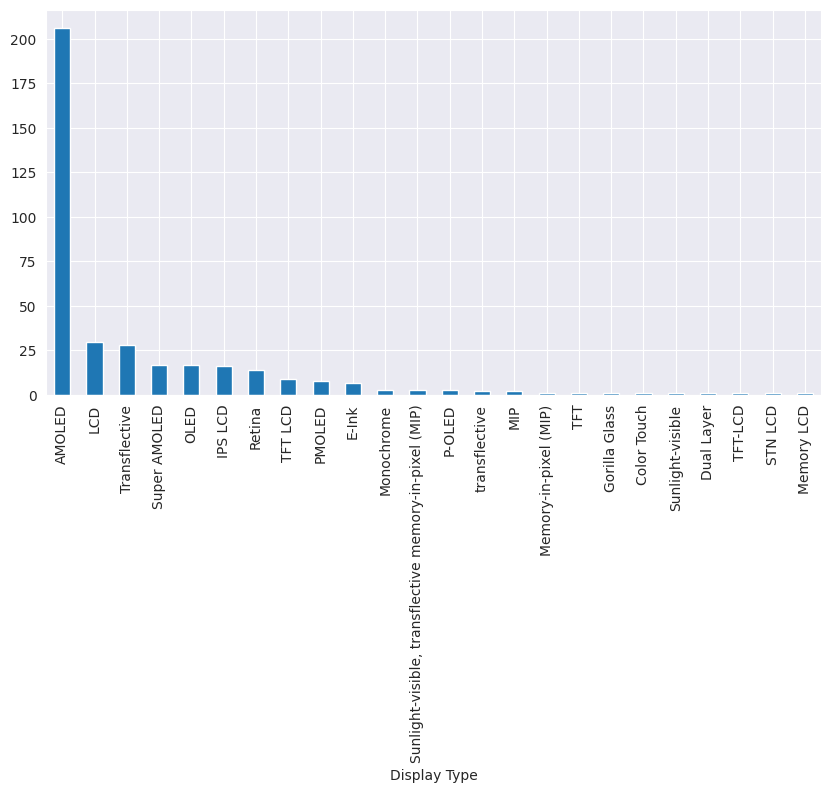

In [138]:
plt.figure(figsize=(10,5))
df_2['Display Type'].value_counts().plot(kind='bar')

Посмотрим какие бренды умных часов представлены в датасете.

In [139]:
df_2['Brand'].unique()

array(['Apple', 'Samsung', 'Garmin', 'Fitbit', 'Fossil', 'Huawei',
       'TicWatch', 'Oppo', 'Amazfit', 'Withings', 'Suunto', 'Mobvoi',
       'Polar', 'Skagen', 'Ticwatch', 'Xiaomi', 'Honor', 'LG', 'Casio',
       'OnePlus', 'Misfit', 'Moto', 'MyKronoz', 'Nubia', 'Sony', 'Zepp',
       'Realme', 'Timex', 'Matrix', 'Kate Spade', 'Diesel',
       'Michael Kors', 'Zeblaze', 'Kospet', 'Lemfo', 'TAG Heuer',
       'Montblanc', 'Asus', 'Emporio Armani', 'Polaroid', 'Motorola',
       'Nokia'], dtype=object)

Moto и Motorola обозначают одно и тоже, объединяем и назначаем одно имя.

In [140]:
def segment_brand(brand):
    if 'Moto' in brand or 'Motorola' in brand:
        return 'Motorola'
    else:
        return brand

df_2['Brand'] = df_2['Brand'].apply(segment_brand)

Выведем график, отражающий сколько для каждого бренда существует объектов в датасете.

<Axes: xlabel='Brand'>

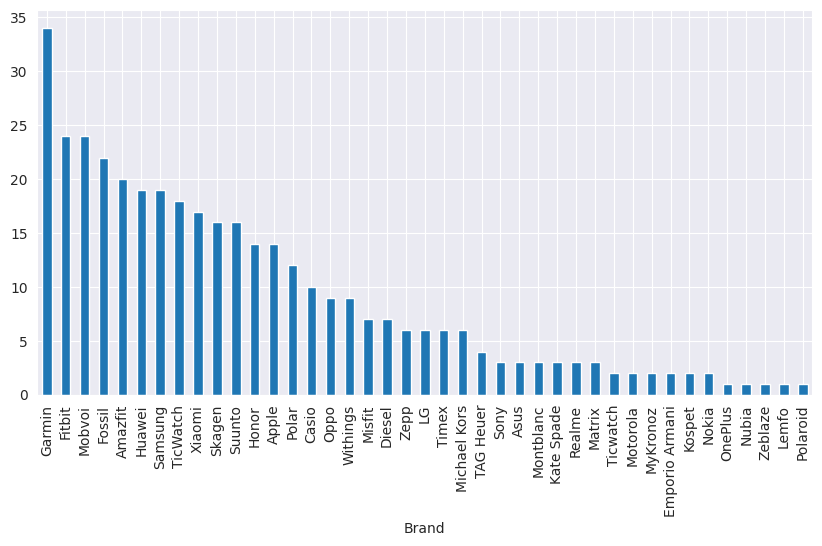

In [141]:
plt.figure(figsize=(10,5))
df_2['Brand'].value_counts().plot(kind='bar')

Посмотрим на разрешения дисплеев, представленных в датасете.

In [142]:
df_2.Resolution.unique()

array(['396 x 484', '450 x 450', '416 x 416', '336 x 336', '466 x 466',
       '360 x 360', '372 x 430', '454 x 454', '240 x 240', '394 x 324',
       '240 x 201', '368 x 448', '390 x 390', '400 x 400', '324 x 394',
       '320 x 320', '348 x 442', '402 x 476', '480 x 480', '176 x 176',
       '300 x 300', '200 x 200', '280 x 280', '128 x 128', '240 x 198',
       '280 x 456', '328 x 328', '960 x 192', '348 x 250', '320 x 300',
       '320 x 302', '228 x 172', '160 x 160', '260 x 260', '126 x 36',
       '326 x 326'], dtype=object)

Разобьем разрешения дисплеев на категории в зависимости от их величины. Это поможет снизить сложность данных, сделать модель более устойчивой к шуму, снизить влияние выбросов.

In [143]:
def segment_resolution(resolution):
    res = resolution.split(' x ')
    width = int(res[0])
    height = int(res[1])
    if width < 200 or height < 200:
        return 'Low'
    elif width < 400 or height < 400:
        return 'Medium'
    elif width < 800 or height < 800:
        return 'High'
    else:
        return 'Very high'

df_2['Resolution'] = df_2['Resolution'].apply(segment_resolution)

Выведем график, отражающий сколько для каждого класса разрешений дисплея существует объектов в датасете.

<Axes: xlabel='Resolution'>

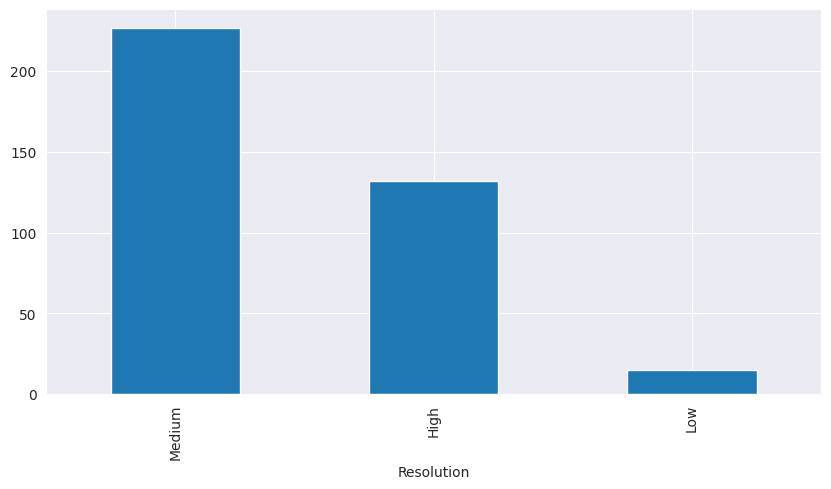

In [144]:
plt.figure(figsize=(10,5))
df_2['Resolution'].value_counts().plot(kind='bar')

Посмотрим на мощность батареи смарт-часов, представленных в датасете.

In [145]:
df_2['Battery Life (days)'].unique()

array(['18', '40', '11', '6', '24', '14', '2', '4', '12', '30', '45', '5',
       '10', '3', '48', '7', '16', '9', '25', '72', '60', '56', '70', '1',
       '48 hours', '15', 'Unlimited', '1.5', '20', '8'], dtype=object)

Разобьем значения мощности батареи смарт-часов на категории в зависимости от ее величины.

In [146]:
def segment_battery_life(battery_life):
    if battery_life == '48 hours':
        return '1-10'
    elif battery_life == '1.5':
        return '1-10'
    elif battery_life == 'Unlimited':
        return '>30'
    else:
        try:
            days = int(battery_life)
            if days >= 1 and days <= 10:
                return '1-10'
            elif days >= 11 and days <= 20:
                return '11-20'
            elif days >= 21 and days <= 30:
                return '21-30'
            else:
                return '>30'
        except ValueError:
            return 'Unknown'

df_2['Battery Life (days)'] = df_2['Battery Life (days)'].apply(segment_battery_life)

Выведем график, отражающий сколько для каждой категории мощности батареи существует объектов в датасете.

<Axes: xlabel='Battery Life (days)'>

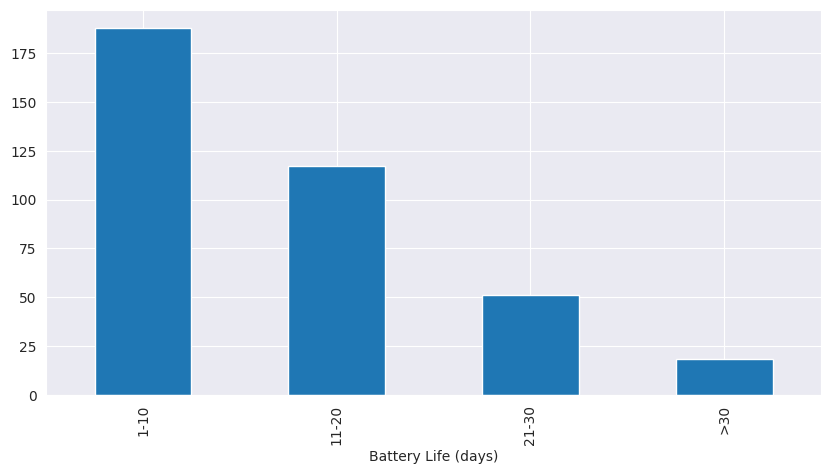

In [147]:
plt.figure(figsize=(10,5))
df_2['Battery Life (days)'].value_counts().plot(kind='bar')

Посмотрим на допустимую глубину погружения смарт-часов, представленных в датасете.

In [148]:
df_2['Water Resistance (meters)'].unique()

array(['50', '30', '100', '1.5', 'Not specified', '200', '10'],
      dtype=object)

Разобьем значения допустимой глубины погружения в воду смарт-часов на категории в зависимости от ее величины.

In [149]:
def segment_water_resistance(water_resistance):
    if pd.isnull(water_resistance) or water_resistance == 'Not specified':
        return 'Unknown'
    elif water_resistance == '1.5':
        return 'Splash resistant'
    else:
        depth = int(water_resistance)
        if depth >= 0 and depth <= 50:
            return '50m or less'
        elif depth > 50 and depth <= 100:
            return '51m - 100m'
        else:
            return 'More than 100m'


df_2['Water Resistance (meters)'] = df_2['Water Resistance (meters)'].apply(segment_water_resistance)

Выведем график, отражающий сколько для каждой категории допустимой глубины погружения существует объектов в датасете.

<Axes: xlabel='Water Resistance (meters)'>

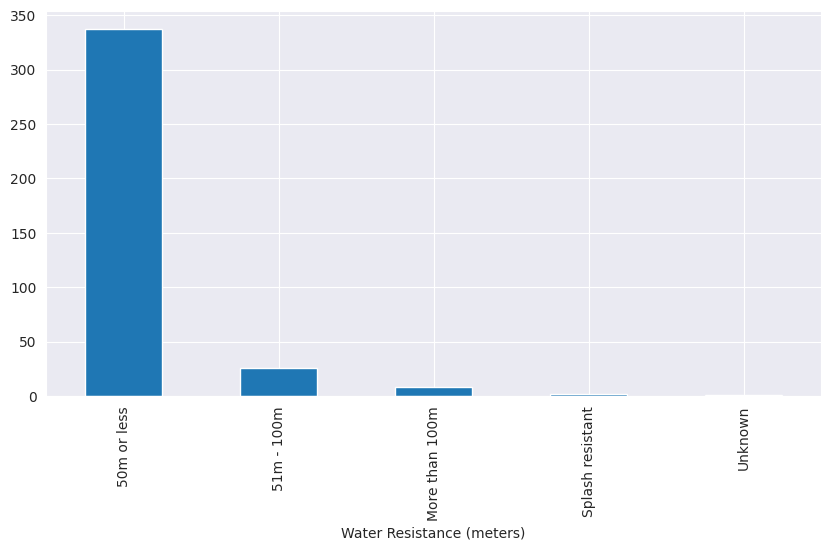

In [150]:
plt.figure(figsize=(10,5))
df_2['Water Resistance (meters)'].value_counts().plot(kind='bar')

In [151]:
df_2['Connectivity'].unique()

array(['Bluetooth, Wi-Fi, Cellular', 'Bluetooth, Wi-Fi', 'Bluetooth',
       'Bluetooth, Wi-Fi, GPS', 'Bluetooth, Wi-Fi, NFC'], dtype=object)

In [152]:
new_columns = df_2['Connectivity'].str.get_dummies(sep=', ')
new_columns.head()

,Bluetooth,Cellular,GPS,NFC,Wi-Fi
0,1,1,0,0,1
1,1,1,0,0,1
2,1,0,0,0,1
3,1,0,0,0,1
4,1,0,0,0,1


In [153]:
new_columns.select_dtypes(include='int64').nunique()

Bluetooth    1
Cellular     2
GPS          2
NFC          2
Wi-Fi        2
dtype: int64

In [154]:
new_columns = new_columns.drop(['Bluetooth', 'GPS', 'NFC'], axis=1)

In [155]:
df_2 = df_2.drop('Connectivity', axis=1)
df_2 = pd.concat([df_2, new_columns], axis=1)
df_2.head()

,Brand,Model,Operating System,Display Type,Display Size (inches),Resolution,Water Resistance (meters),Battery Life (days),Heart Rate Monitor,GPS,NFC,Price (USD),Cellular,Wi-Fi
0,Apple,Watch Series 7,watchOS,Retina,1.90,Medium,50m or less,11-20,Yes,Yes,Yes,399,1,1
1,Samsung,Galaxy Watch 4,Wear OS,AMOLED,1.40,High,50m or less,>30,Yes,Yes,Yes,249,1,1
2,Garmin,Venu 2,Garmin OS,AMOLED,1.30,High,50m or less,11-20,Yes,Yes,No,399,0,1
3,Fitbit,Versa 3,Fitbit OS,AMOLED,1.58,Medium,50m or less,1-10,Yes,Yes,Yes,229,0,1
4,Fossil,Gen 6,Wear OS,AMOLED,1.28,High,50m or less,21-30,Yes,Yes,Yes,299,0,1


Посмотрим на размеры дисплеев смарт-часов, представленных в датасете.

In [156]:
df_2['Display Size (inches)'].unique()

array([1.9 , 1.4 , 1.3 , 1.58, 1.28, 1.43, 1.75, 1.39, 1.65, 1.2 , 1.57,
       1.  , 1.78, 1.91, 1.38, 1.06, 1.35, 1.34, 0.9 , 1.04, 1.64, 1.19,
       4.01, 1.6 , 1.42, 2.1 , 1.23, 1.1 , 1.22, 1.36, 1.32])

Выведем график, отражающий сколько для каждого размера дисплея существует объектов в датасете.

<Axes: xlabel='Display Size (inches)'>

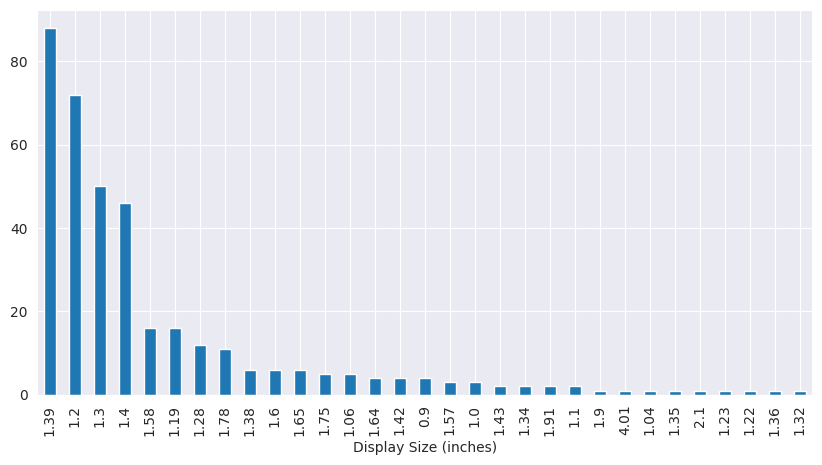

In [157]:
plt.figure(figsize=(10,5))
df_2['Display Size (inches)'].value_counts().plot(kind='bar')

Посмотрим сколько уникальных значений существует для каждого столбца.

In [158]:
df_2.select_dtypes(include=['object', 'int64', 'float64']).nunique()

Brand                         41
Model                        135
Operating System              32
Display Type                  24
Display Size (inches)         31
Resolution                     3
Water Resistance (meters)      5
Battery Life (days)            4
Heart Rate Monitor             1
GPS                            2
NFC                            2
Price (USD)                   49
Cellular                       2
Wi-Fi                          2
dtype: int64

Можно заметить, что все объекты по параметру Heart Rate Monitor имеют одно значение, следовательно оно не имеет значения для обучения, поэтому удаляем данный столбец.

In [159]:
df_2.drop(columns='Heart Rate Monitor', inplace=True)

Для обучения проводим кодировку категориальный признаков в числовой формат данных.

In [160]:
for col in df_2.select_dtypes(include=['object']).columns:
    label_encoder = preprocessing.LabelEncoder()
    label_encoder.fit(df_2[col].unique())
    df_2[col] = label_encoder.transform(df_2[col])

Построим боксплоты для данных датасета.

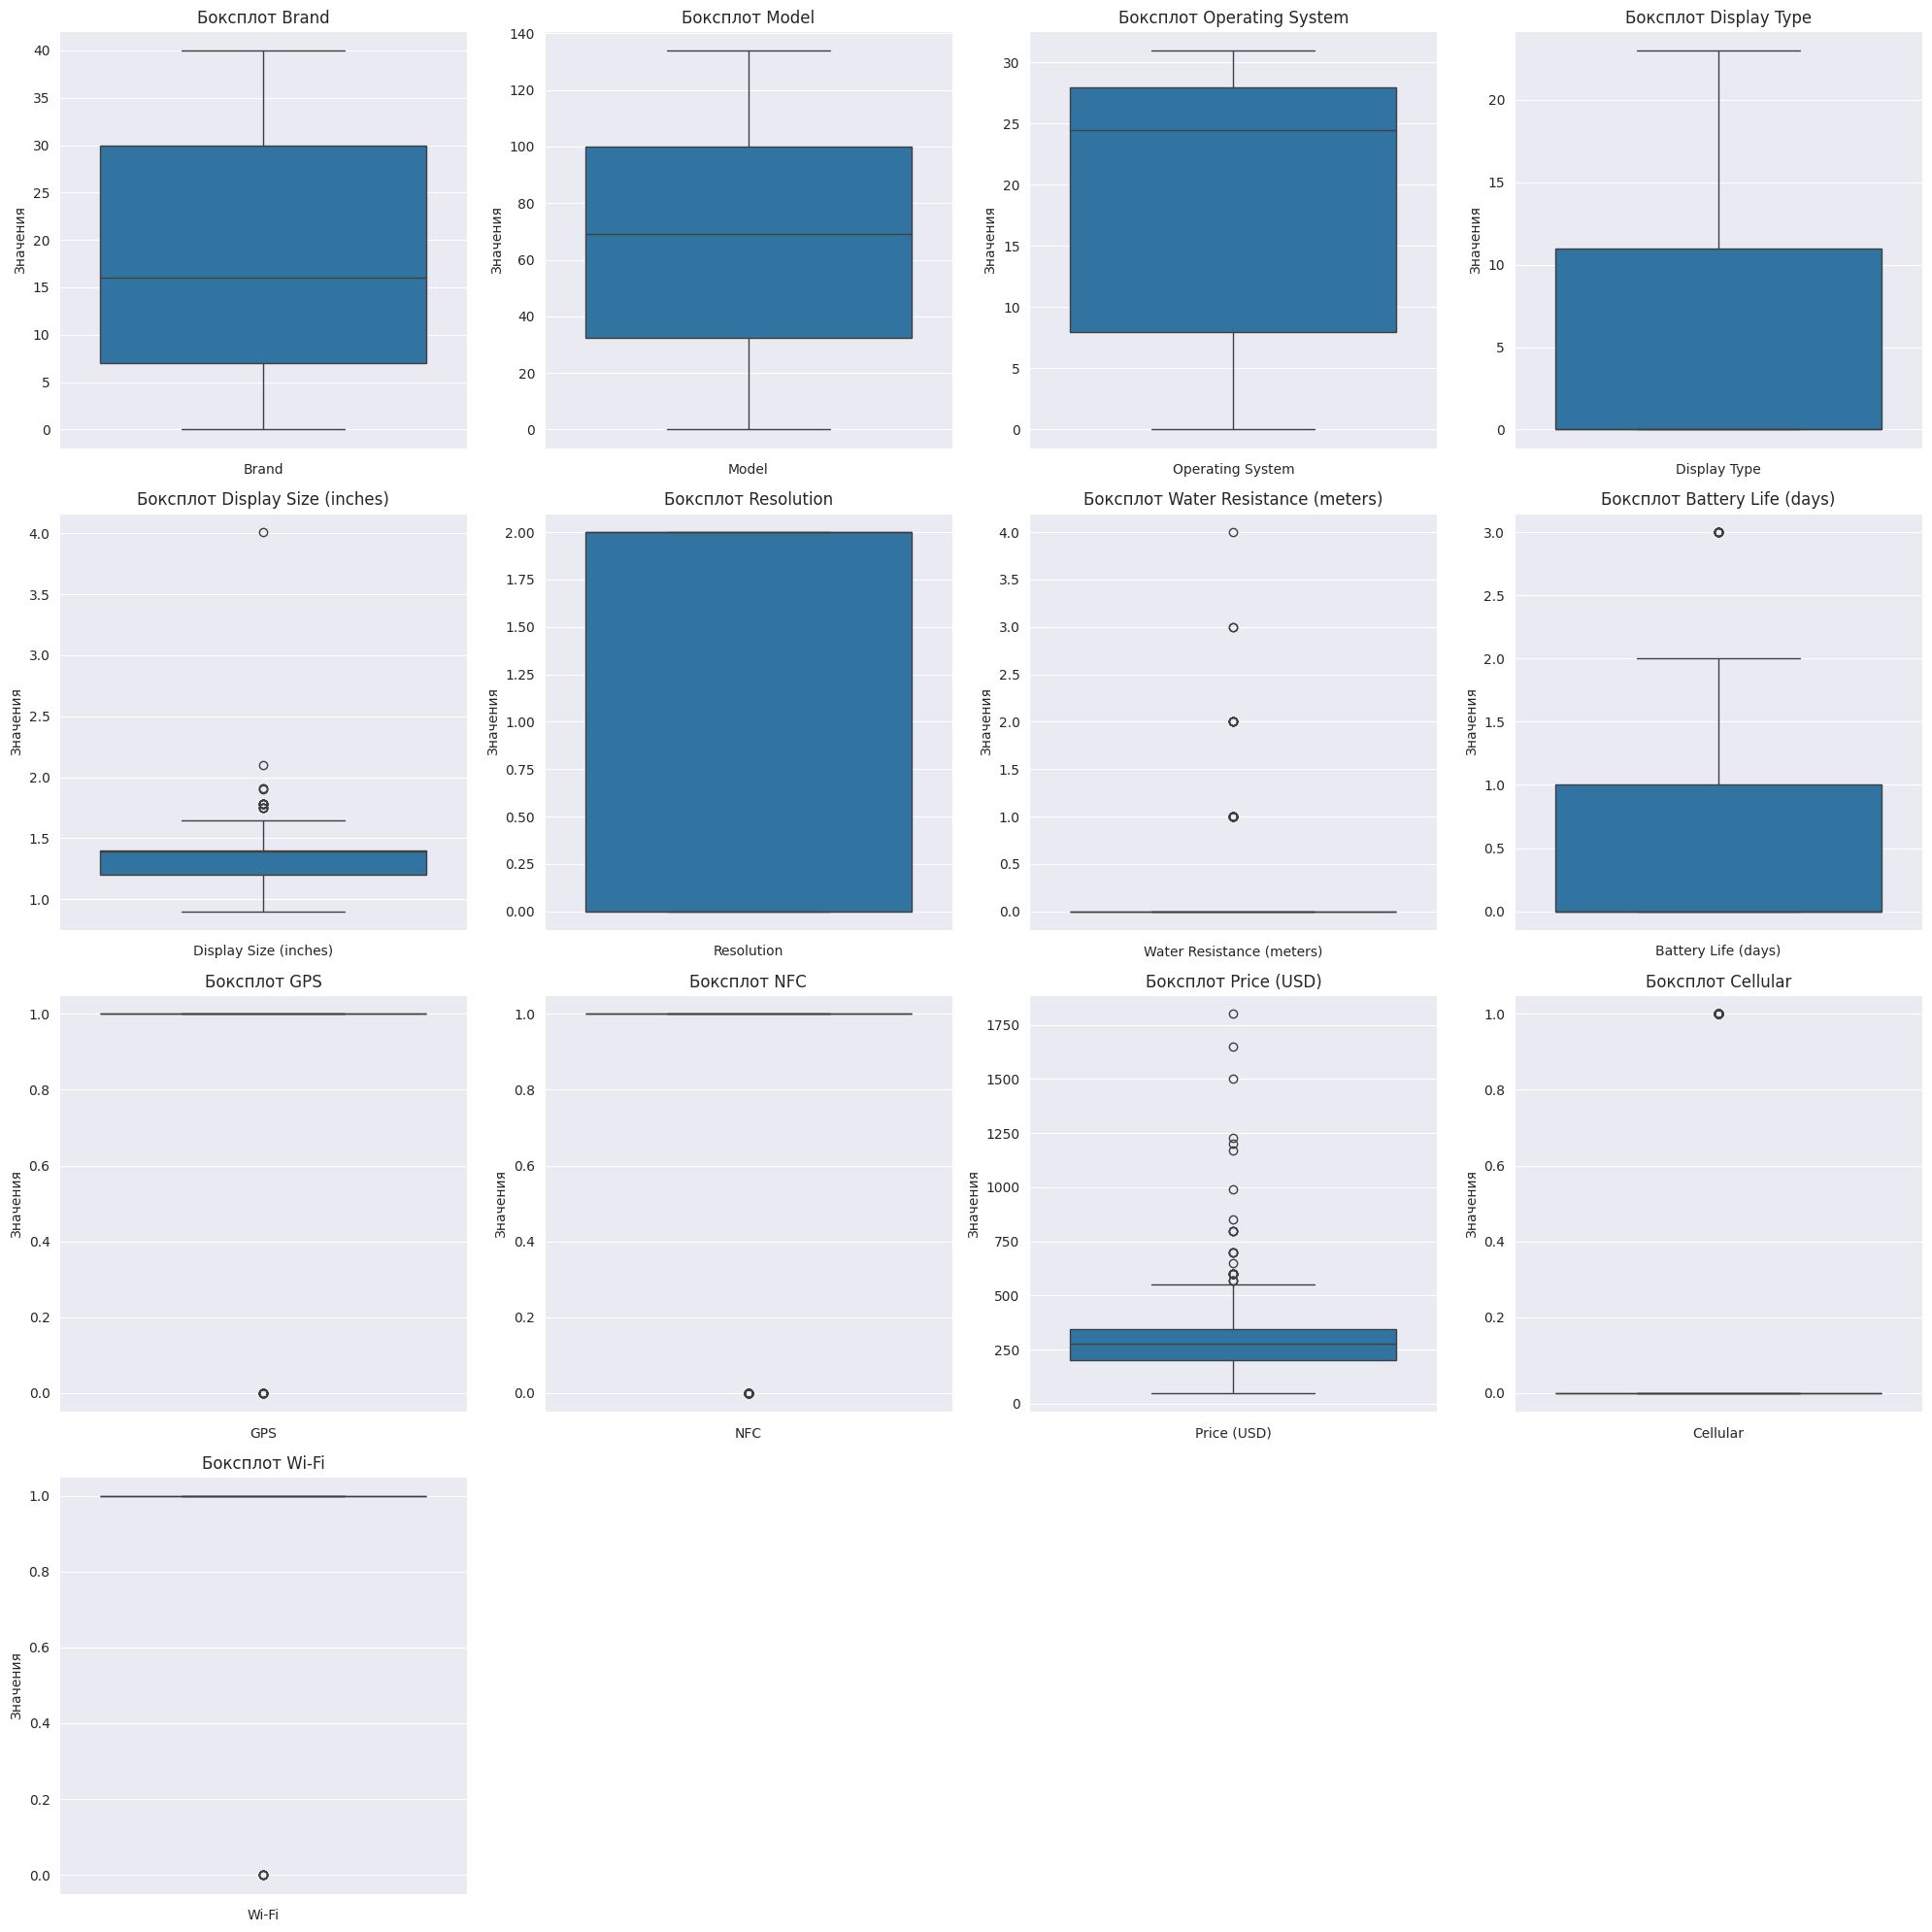

In [161]:
n_cols = 4
n_rows = (len(df_2.columns) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))
axes = axes.flatten()

for idx, col in enumerate(df_2.columns):
    sns.boxplot(y=df_2[col], ax=axes[idx])
    axes[idx].set_title(f'Боксплот {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Значения')

for i in range(len(df_2.columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

Видны выбросы в Battery Life (days), Display Size (inches) и Price (USD). Water Resistance (meters) - дискретные данные, большая часть которых находится в нуле.Wi-Fi, NFC, Cellular и GPS - бинарные данные с большей частотой в значении, обозначенном линией, и меньшей в значении, обозначенном точкой.

Проведем анализ взаимосвязей признаков для задачи регрессии, используя визуализацию взаимосвязей pairplot и матрицу корреляции.



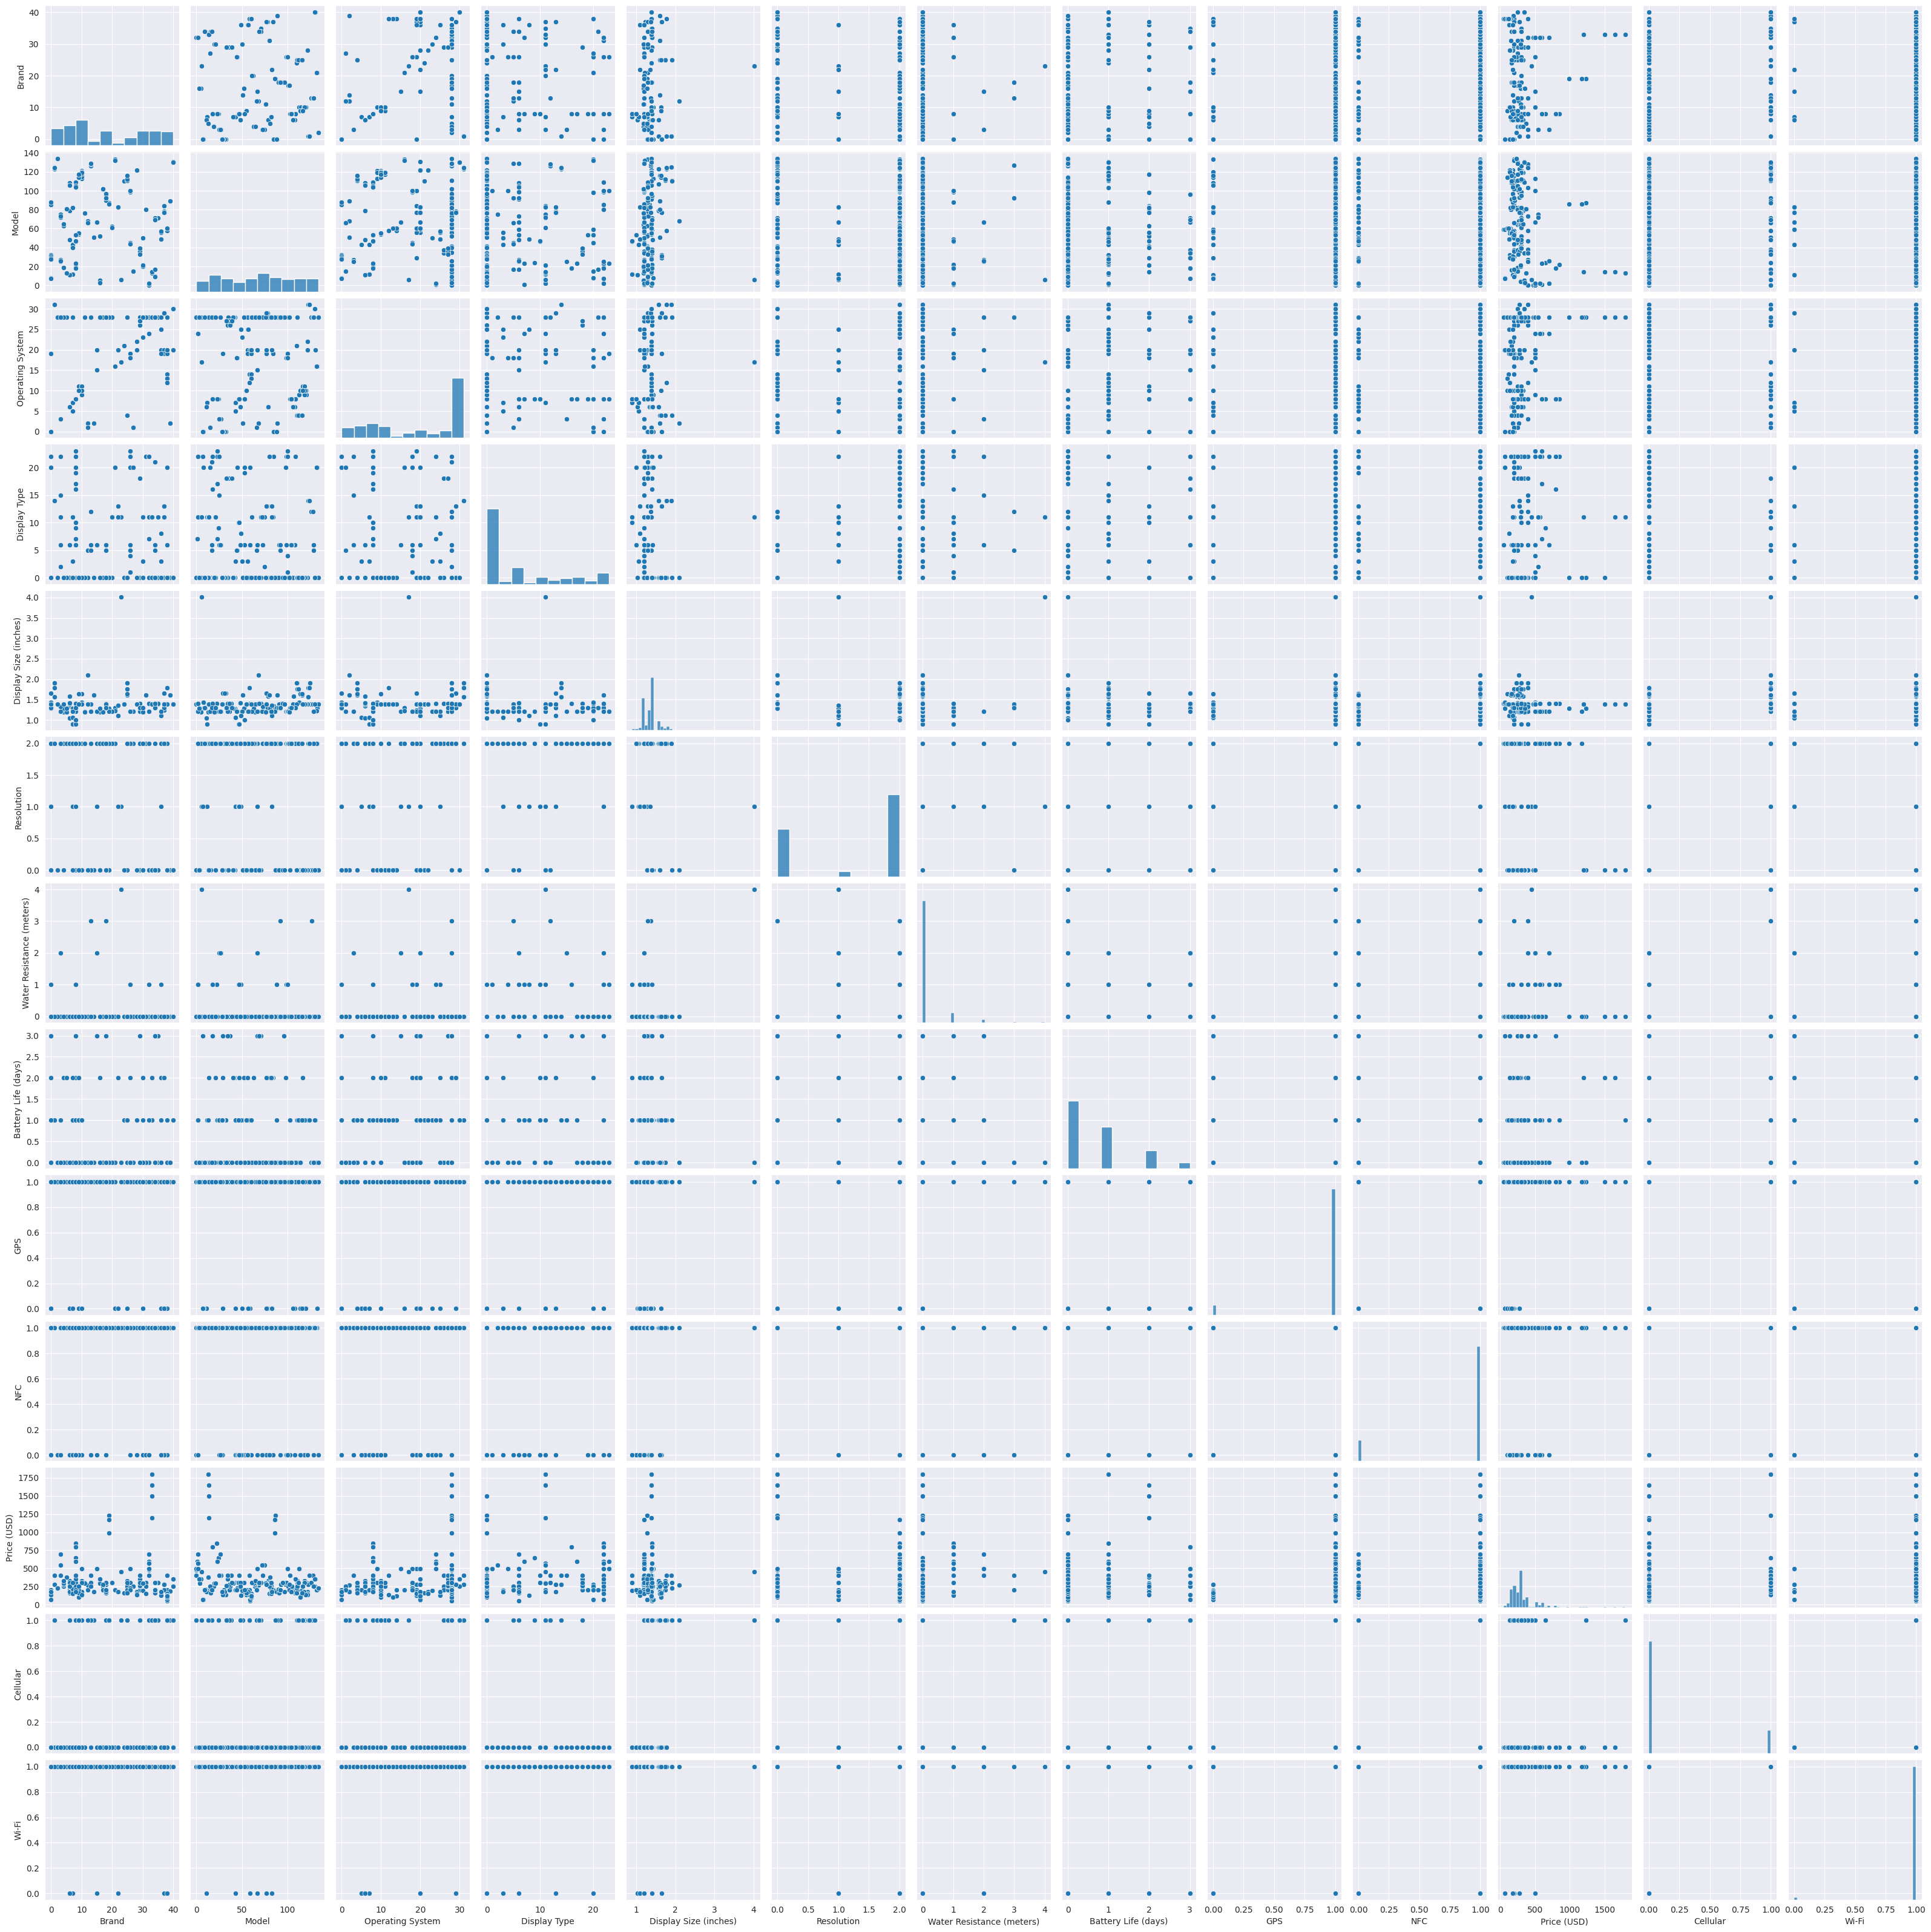

In [162]:
sns.pairplot(df_2)
plt.show()

<Axes: >

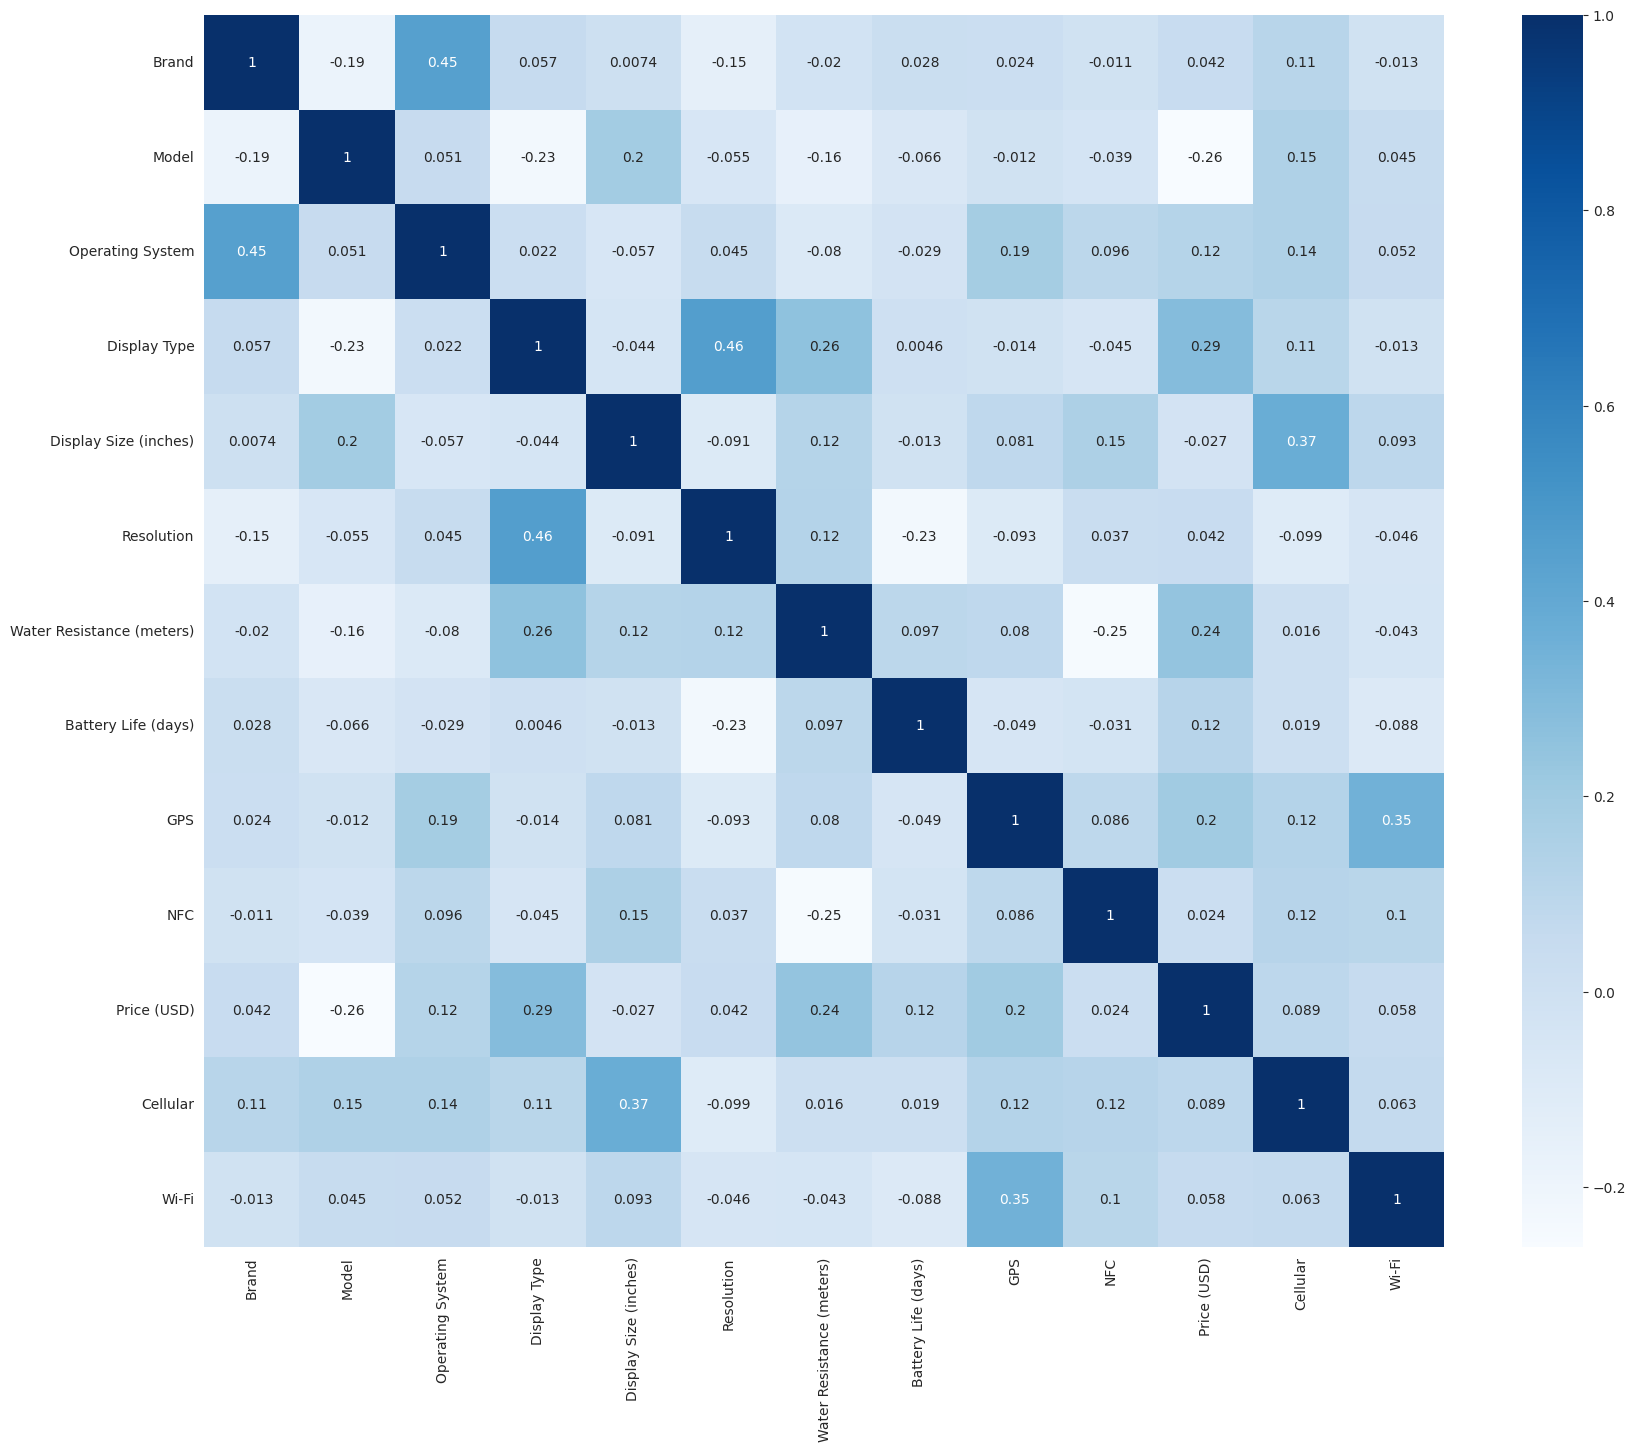

In [163]:
plt.figure(figsize=(20, 16))
sns.heatmap(df_2.corr(), fmt='.2g', annot=True, cmap="Blues")

Убираем признаки с низкой корреляцией с признаком Price (USD) (у которых значение корреляции меньше 0.1).

In [164]:
df_2.drop(columns=['Brand',  'Display Size (inches)', 'Resolution', 'NFC', 'Cellular', 'Wi-Fi'], inplace=True)

Создадим два набора обучающий и тестовых выборок. Целевой переменной для задачи регрессии будет цена часов. Для тестовой выборки будет отведено 20% данных, для обучающей выборки - 80%.

In [165]:
X = df_2.drop(['Price (USD)'], axis=1)
y = df_2['Price (USD)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)



Выполним стандартизацию (нормализацию) данных, используя класс StandardScaler из библиотеки sklearn.preprocessing.

In [166]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Создаем объект регрессора на основе того же алгоритма. Параметр n_neighbors, который определяет количество соседей, учитываемых при принятии решения, выставлен также в величину 3, так как после проведения анализа обучения с изменением данного параметра было замечено ухудшение точности предсказаний обученной модели.

In [167]:
model = KNeighborsRegressor(n_neighbors=3)

Запускаем обучение модели для задачи регрессии.

In [168]:
model.fit(X_train_scaled, y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


Выполним оценку производительности модели машинного обучения. Для этого посмотрим на значения средней квадратической ошибки (MSE) и средней абсолютной ошибки (MAE) для предсказаний значений на тестовой и обучающей выборках.

In [169]:
y_pred_test = model.predict(X_test_scaled)
y_pred_train = model.predict(X_train_scaled)

mse_test_2 = mean_squared_error(y_test, y_pred_test)
mae_test_2 = mean_absolute_error(y_test, y_pred_test)

mse_train_2 = mean_squared_error(y_train, y_pred_train)
mae_train_2 = mean_absolute_error(y_train, y_pred_train)

print_r(mse_test, mse_train, mae_test, mae_train_2)

Mean Squared Error for test data: 10865.11259
Mean Absolute Error for test data: 52.93778

Mean Squared Error for train data: 13036.23003
Mean Absolute Error for train data: 45.58194


Сравним результаты обучения модели до и после проведенных работ по улучшению бейзлайна.

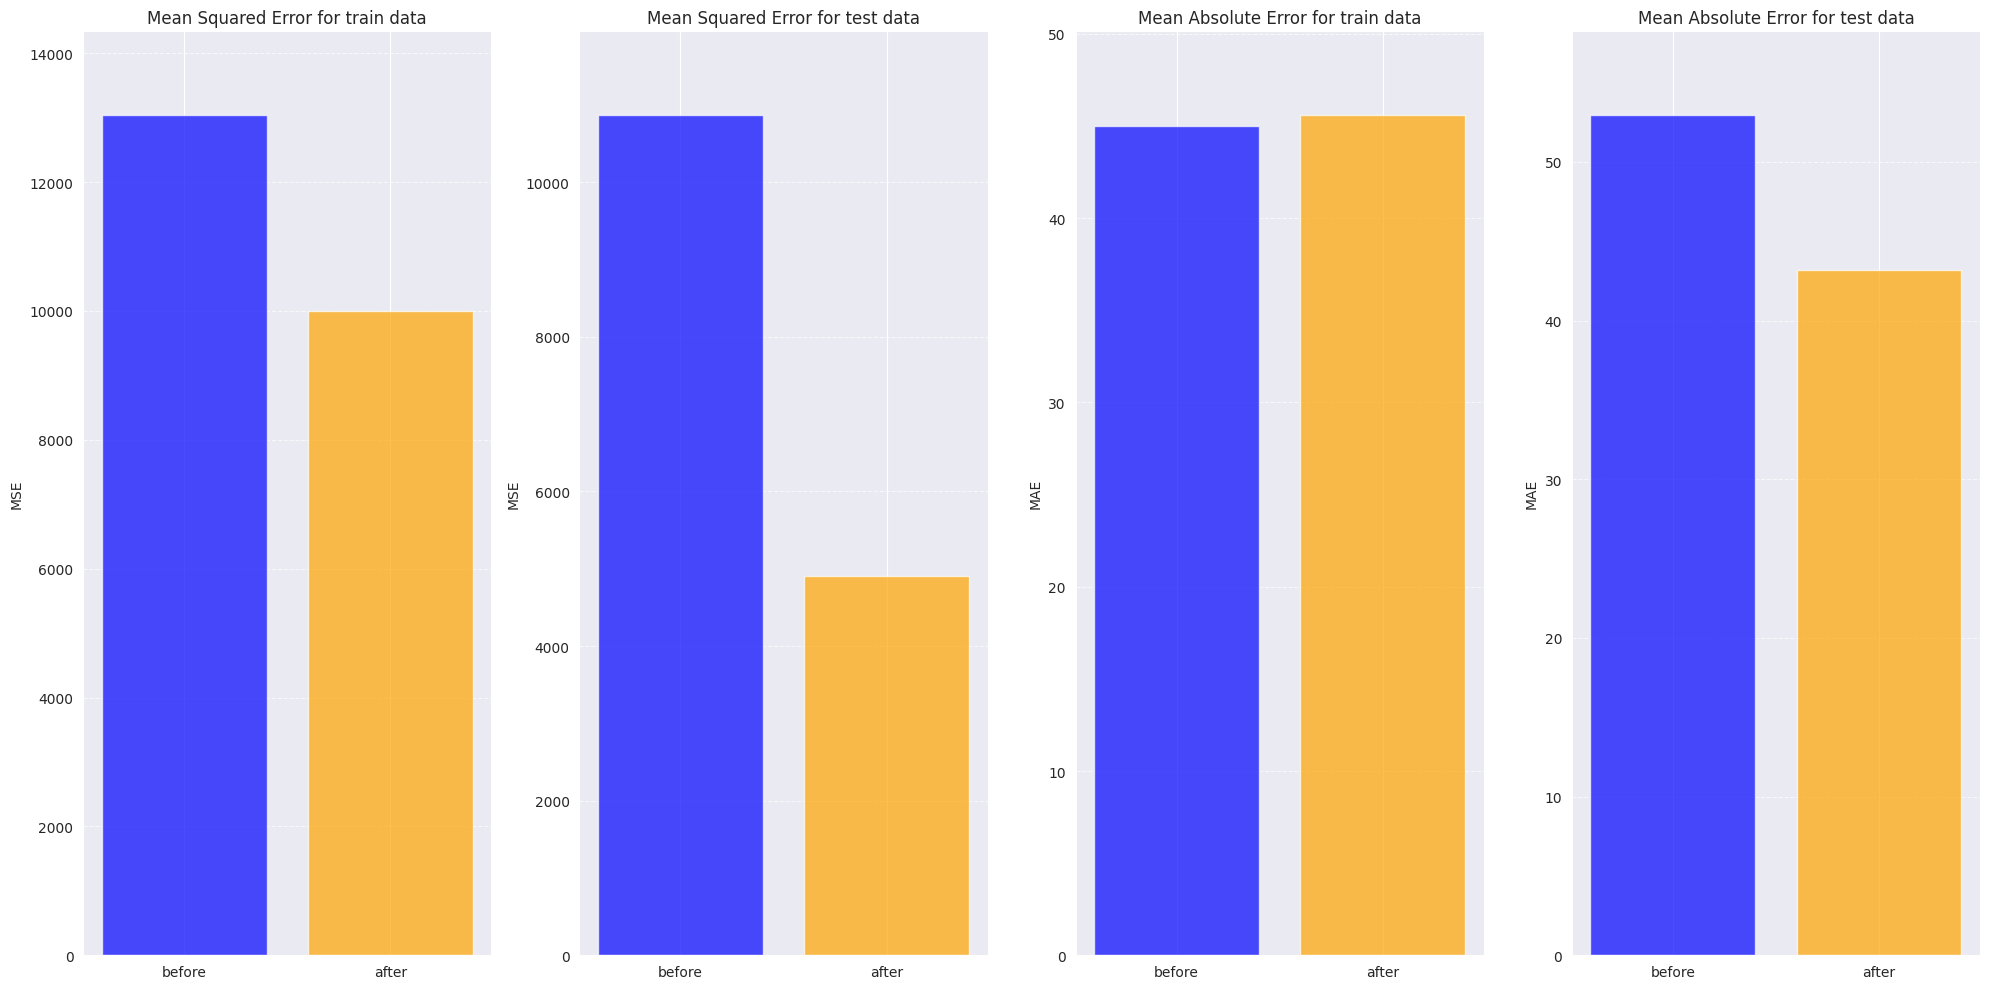

In [170]:
labels = ['before', 'after']
colors = ['blue', 'orange']

def visualization(ax, values, name, label):
    ax.bar(labels, values, color=colors, alpha=0.7)
    ax.set_title(name)
    ax.set_ylabel(label)
    ax.set_ylim(0, max(values) * 1.1)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

fig, axs = plt.subplots(1, 4, figsize=(20, 10))

visualization(axs[0], [mse_train, mse_train_2], 'Mean Squared Error for train data', 'MSE')
visualization(axs[1], [mse_test, mse_test_2], 'Mean Squared Error for test data', 'MSE')
visualization(axs[2], [mae_train, mae_train_2], 'Mean Absolute Error for train data', 'MAE')
visualization(axs[3], [mae_test, mae_test_2], 'Mean Absolute Error for test data', 'MAE')



plt.tight_layout()
plt.show()

Видно, что точность моделей улучшилась после проведенных работ над данными и параметрами обучения. Проведенное улучшение бейзлайна считаю успешным.

Создаем  объект регрессора на основе того же алгоритма. Параметр n_neighbors, который определяет количество соседей, учитываемых при принятии решения, также выставляем в величину 3. Датасет и параметры будем использовать те, что были получены **до улучшения бейзлайна**.

In [171]:
from implementation import MyKNeighborsRegressor
knn_r = MyKNeighborsRegressor(n_neighbors=3)

Запускаем обучение модели для задачи регрессии.

In [172]:
knn_r.fit(X_train_r, y_train_r)

In [173]:
y_pred_test_knn_r = knn_r.predict(X_test_r)
y_pred_train_knn_r = knn_r.predict(X_train_r)

mse_test_knn = mean_squared_error(y_test_r, y_pred_test_knn_r)
mae_test_knn = mean_absolute_error(y_test_r, y_pred_test_knn_r)

mse_train_knn = mean_squared_error(y_train_r, y_pred_train_knn_r)
mae_train_knn = mean_absolute_error(y_train_r, y_pred_train_knn_r)

print_r(mse_test_knn, mse_train_knn, mae_test_knn, mae_train_knn)

Mean Squared Error for test data: 10739.45333
Mean Absolute Error for test data: 52.62667

Mean Squared Error for train data: 13073.57674
Mean Absolute Error for train data: 45.47492


Сравним работу обученных моделей из библиотеки и самостоятельной реализации на датасете и параметрах, имеющихся до улучшения бейзлайна.

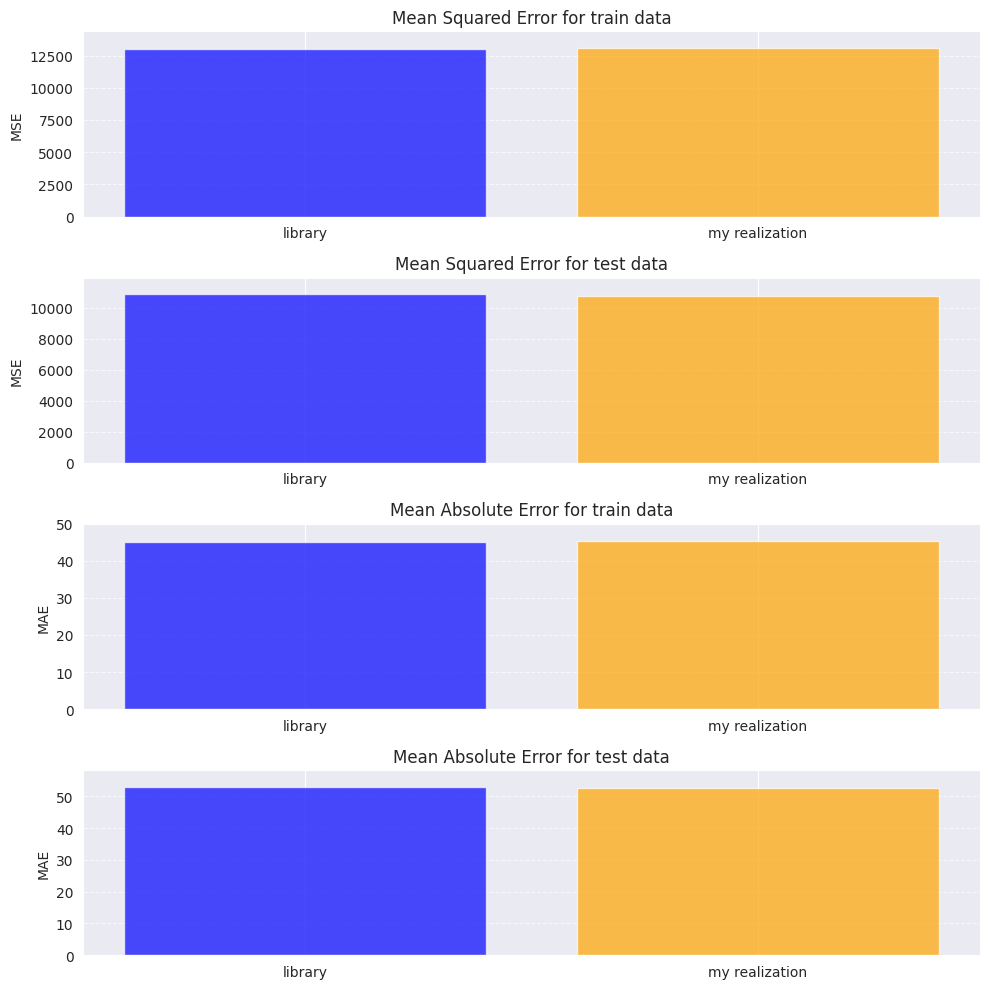

In [174]:
labels = ['library', 'my realization']
fig, axs = plt.subplots(4, figsize=(10, 10))

visualization(axs[0], [mse_train, mse_train_knn], 'Mean Squared Error for train data', 'MSE')
visualization(axs[1], [mse_test, mse_test_knn], 'Mean Squared Error for test data', 'MSE')
visualization(axs[2], [mae_train, mae_train_knn], 'Mean Absolute Error for train data', 'MAE')
visualization(axs[3], [mae_test, mae_test_knn], 'Mean Absolute Error for test data', 'MAE')

plt.tight_layout()
plt.show()

Видно, что библиотечная модель и модель самостоятельной реализации после обучения имеют аналогичные показатели погрешности, из-за чего можно сделать вывод об успехе собственной реализации алгоритма машинного обучения KNN.

Создаем объект регрессора на основе того же алгоритма. Параметр n_neighbors, который определяет количество соседей, учитываемых при принятии решения, также выставляем в величину 3. Датасет и параметры будем использовать те, что были получены **после улучшения бейзлайна**.


In [175]:
knn_r_2 = MyKNeighborsRegressor(n_neighbors=3)

Запускаем обучение модели для задачи регрессии.

In [176]:
knn_r_2.fit(X_train_scaled, y_train)

Выполним оценку производительности модели машинного обучения. Для этого посмотрим на значения средней квадратической ошибки (MSE) и средней абсолютной ошибки (MAE) для предсказаний значений на тестовой и обучающей выборках.


In [177]:
y_pred_test_knn_r_2 = knn_r_2.predict(X_test_scaled)
y_pred_train_knn_r_2 = knn_r_2.predict(X_train_scaled)

mse_test_knn_2 = mean_squared_error(y_test, y_pred_test_knn_r_2)
mae_test_knn_2 = mean_absolute_error(y_test, y_pred_test_knn_r_2)

mse_train_knn_2 = mean_squared_error(y_train, y_pred_train_knn_r_2)
mae_train_knn_2 = mean_absolute_error(y_train, y_pred_train_knn_r_2)

print_r(mse_test_knn_2, mse_train_knn_2, mae_test_knn_2, mae_train_knn_2)

Mean Squared Error for test data: 4876.41778
Mean Absolute Error for test data: 42.93333

Mean Squared Error for train data: 9922.62690
Mean Absolute Error for train data: 45.38573


Сравним работу обученных моделей из библиотеки и самостоятельной реализации на датасете и параметрах, полученных **после улучшения бейзлайна**.

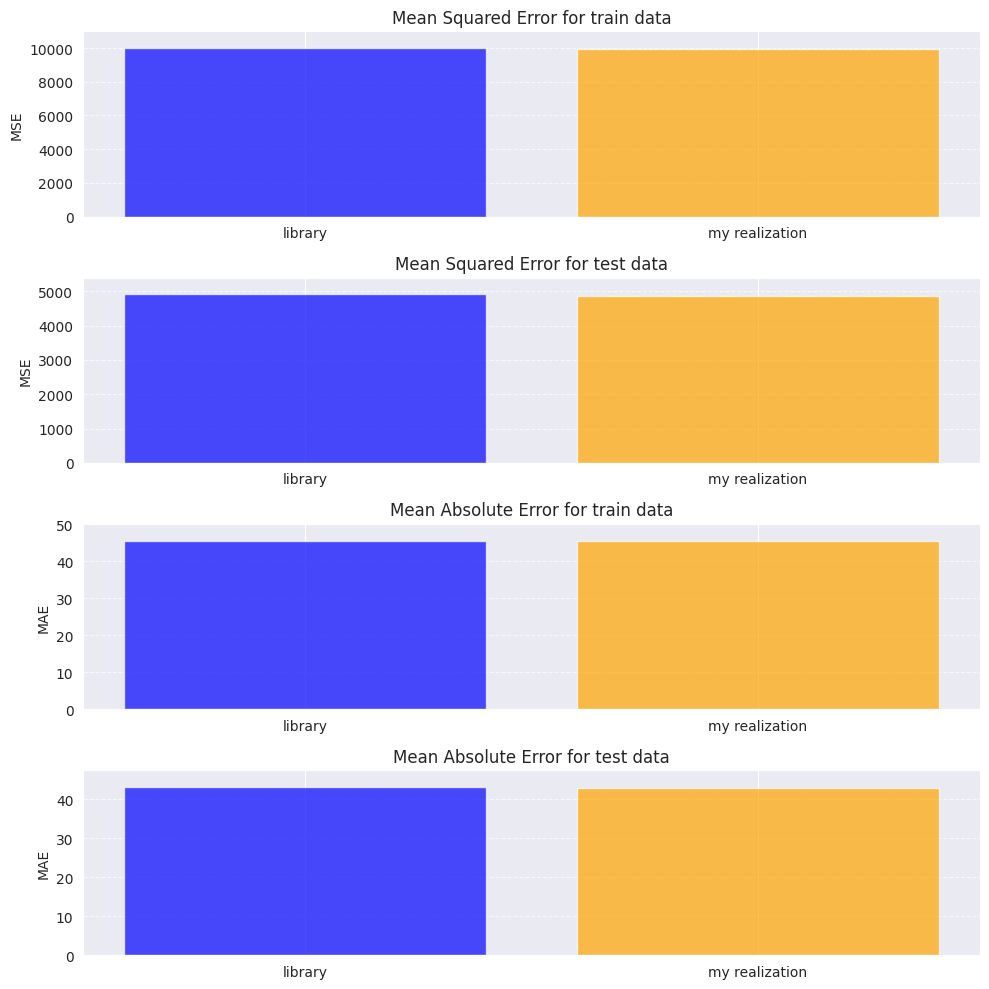

In [178]:
fig, axs = plt.subplots(4, figsize=(10, 10))

visualization(axs[0], [mse_train_2, mse_train_knn_2], 'Mean Squared Error for train data', 'MSE')
visualization(axs[1], [mse_test_2, mse_test_knn_2], 'Mean Squared Error for test data', 'MSE')
visualization(axs[2], [mae_train_2, mae_train_knn_2], 'Mean Absolute Error for train data', 'MAE')
visualization(axs[3], [mae_test_2, mae_test_knn_2], 'Mean Absolute Error for test data', 'MAE')

plt.tight_layout()
plt.show()

Видно, что библиотечная модель и модель самостоятельной реализации после обучения имеют аналогичные показатели погрешности, из-за чего можно сделать вывод об успехе собственной реализации алгоритма машинного обучения KNN.